In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/Walmart DataSet.csv')

In [3]:
df.head(5)

Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1  05-02-2010    1643690.90             0        42.31       2.572   
1      1  12-02-2010    1641957.44             1        38.51       2.548   
2      1  19-02-2010    1611968.17             0        39.93       2.514   
3      1  26-02-2010    1409727.59             0        46.63       2.561   
4      1  05-03-2010    1554806.68             0        46.50       2.625   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106

In [4]:
df['Store'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45])

**1. If the weekly sales are affected by the unemployment rate, if yes - which stores are suffering the most?**

In [5]:
correlation = df['Weekly_Sales'].corr(df['Unemployment'])
print(f'Over all correlation b/w Weekly sales and Unemployment: {correlation}')

Over all correlation b/w Weekly sales and Unemployment: -0.10617608965795429


In [6]:
store_corr = df.groupby('Store')[['Weekly_Sales','Unemployment']].corr().iloc[0::2,-1]
store_corr = store_corr.reset_index()
store_corr.columns = ['store','drop','sales_unemployment_corr']
store_corr = store_corr.drop('drop',axis=1)
store_corr.sort_values(by='sales_unemployment_corr')

store  sales_unemployment_corr
37     38                -0.785290
43     44                -0.780076
38     39                -0.384681
41     42                -0.356355
40     41                -0.350630
3       4                -0.337015
16     17                -0.263600
2       3                -0.230413
36     37                -0.221287
4       5                -0.207043
42     43                -0.201954
8       9                -0.191534
12     13                -0.171633
6       7                -0.165382
39     40                -0.112528
31     32                -0.099455
0       1                -0.097955
19     20                -0.095341
22     23                -0.077169
15     16                -0.070864
25     26                -0.066899
30     31                -0.064738
7       8                -0.052580
10     11                -0.020339
26     27                -0.014275
23     24                -0.012261
11     12                -0.009286
24     25                -0.004958
44     45                -0.004041
33     34                 0.017010
21     22                 0.039043
5       6                 0.044251
1       2                 0.066325
14     15                 0.078905
28     29                 0.084682
32     33                 0.101175
18     19                 0.101464
9      10                 0.131908
27     28                 0.136671
17     18                 0.139179
29     30                 0.201862
13     14                 0.210786
20     21                 0.218367
34     35                 0.483865
35     36                 0.833734

In [7]:
store_corr.columns

Index(['store', 'sales_unemployment_corr'], dtype='object')

In [8]:
store_corr

store  sales_unemployment_corr
0       1                -0.097955
1       2                 0.066325
2       3                -0.230413
3       4                -0.337015
4       5                -0.207043
5       6                 0.044251
6       7                -0.165382
7       8                -0.052580
8       9                -0.191534
9      10                 0.131908
10     11                -0.020339
11     12                -0.009286
12     13                -0.171633
13     14                 0.210786
14     15                 0.078905
15     16                -0.070864
16     17                -0.263600
17     18                 0.139179
18     19                 0.101464
19     20                -0.095341
20     21                 0.218367
21     22                 0.039043
22     23                -0.077169
23     24                -0.012261
24     25                -0.004958
25     26                -0.066899
26     27                -0.014275
27     28                 0.136671
28     29                 0.084682
29     30                 0.201862
30     31                -0.064738
31     32                -0.099455
32     33                 0.101175
33     34                 0.017010
34     35                 0.483865
35     36                 0.833734
36     37                -0.221287
37     38                -0.785290
38     39                -0.384681
39     40                -0.112528
40     41                -0.350630
41     42                -0.356355
42     43                -0.201954
43     44                -0.780076
44     45                -0.004041

In [9]:
store_corr.head(10)

store  sales_unemployment_corr
0      1                -0.097955
1      2                 0.066325
2      3                -0.230413
3      4                -0.337015
4      5                -0.207043
5      6                 0.044251
6      7                -0.165382
7      8                -0.052580
8      9                -0.191534
9     10                 0.131908

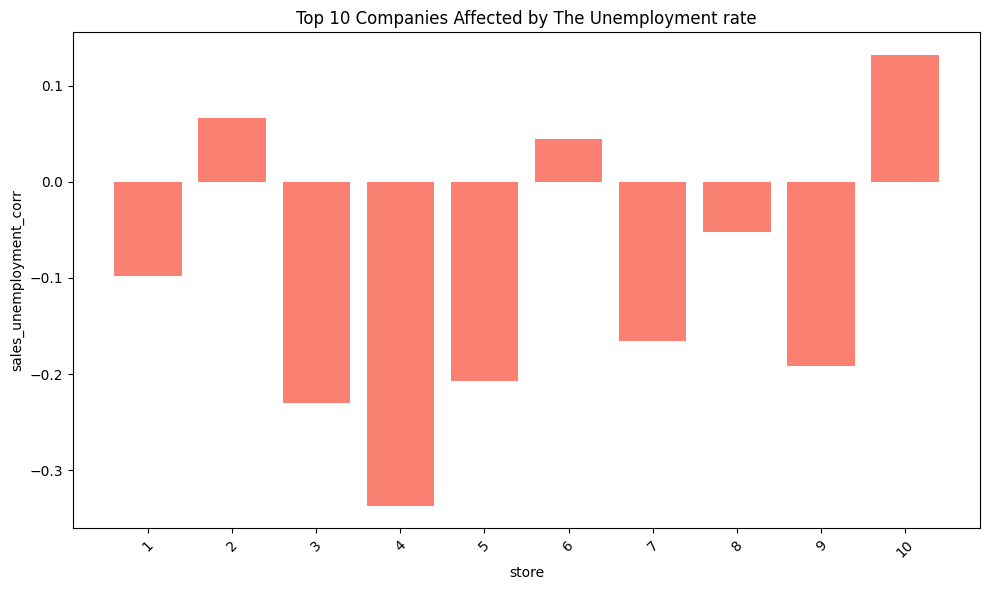

In [10]:
top_stores = store_corr.head(10)
plt.figure(figsize=(10,6))
plt.bar(top_stores['store'].astype(str),top_stores['sales_unemployment_corr'],color='salmon')
plt.title('Top 10 Companies Affected by The Unemployment rate')
plt.xlabel('store')
plt.ylabel('sales_unemployment_corr')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [11]:
top_stores.head(10)

store  sales_unemployment_corr
0      1                -0.097955
1      2                 0.066325
2      3                -0.230413
3      4                -0.337015
4      5                -0.207043
5      6                 0.044251
6      7                -0.165382
7      8                -0.052580
8      9                -0.191534
9     10                 0.131908

.

**2. If the weekly sales show a seasonal trend, when and what could be the reason**

In [12]:
# we face issue for changing date type the date column in the file is in wrong format

In [13]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df['Month'] = df['Date'].dt.month
df['year'] = df['Date'].dt.year

In [14]:
monthly_sales = df.groupby('Month')['Weekly_Sales'].mean().reset_index()

In [15]:
monthly_sales

Month  Weekly_Sales
0       1  9.238846e+05
1       2  1.053200e+06
2       3  1.013309e+06
3       4  1.026762e+06
4       5  1.031714e+06
5       6  1.064325e+06
6       7  1.031748e+06
7       8  1.048017e+06
8       9  9.893353e+05
9      10  9.996321e+05
10     11  1.147266e+06
11     12  1.281864e+06

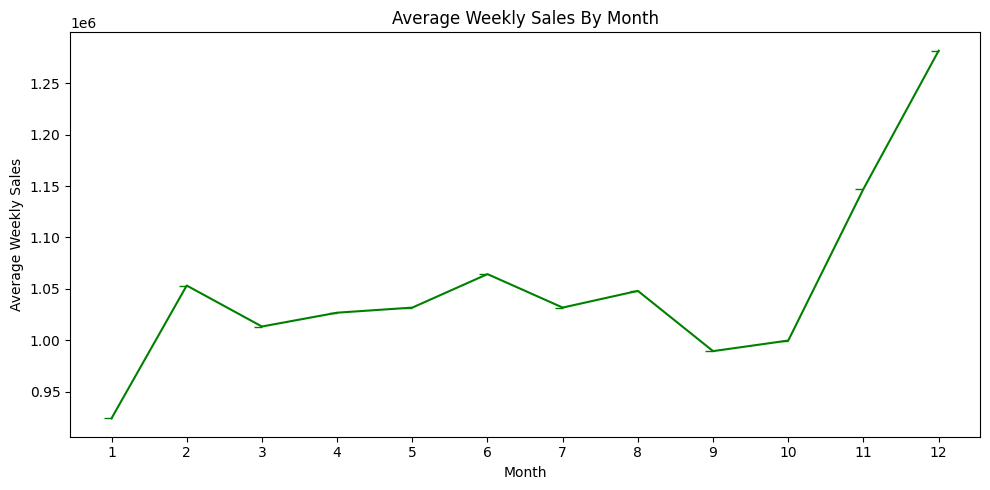

In [16]:
plt.figure(figsize=(10,5))
plt.plot(monthly_sales['Month'],monthly_sales['Weekly_Sales'], marker=0, color='green')
plt.title('Average Weekly Sales By Month')
plt.xlabel('Month')
plt.ylabel('Average Weekly Sales')
plt.xticks(range(1,13))
plt.grid=True
plt.tight_layout()
plt.show()

**Yes, weekly sales show a seasonal trend.
Based on the analysis, sales typically peak in November and December, which aligns with the Thanksgiving, Black Friday, and Christmas holiday shopping seasons.
These periods likely drive increased consumer spending, resulting in higher weekly sales across Walmart stores.**

  .

**3.  Does temperature affect the weekly sales in any manner?**

In [17]:
df.head(5)

Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1 2010-02-05    1643690.90             0        42.31       2.572   
1      1 2010-02-12    1641957.44             1        38.51       2.548   
2      1 2010-02-19    1611968.17             0        39.93       2.514   
3      1 2010-02-26    1409727.59             0        46.63       2.561   
4      1 2010-03-05    1554806.68             0        46.50       2.625   

          CPI  Unemployment  Month  year  
0  211.096358         8.106      2  2010  
1  211.242170         8.106      2  2010  
2  211.289143         8.106      2  2010  
3  211.319643         8.106      2  2010  
4  211.350143         8.106      3  2010

In [18]:
correlation1 = df['Weekly_Sales'].corr(df['Temperature'])
print(f'Over all Correlation B/W Weekly Sales and Temperature : {correlation1}')

Over all Correlation B/W Weekly Sales and Temperature : -0.06381001317946956


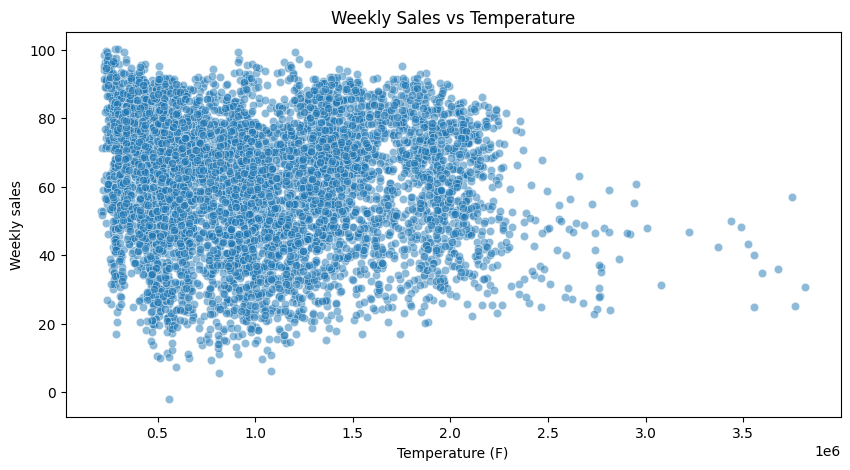

In [19]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='Weekly_Sales',y='Temperature', data=df, alpha = 0.5)
plt.title('Weekly Sales vs Temperature')
plt.xlabel('Temperature (F)')
plt.ylabel('Weekly sales')
plt.grid = True
plt.show()

In [20]:
store_temp_corr = df.groupby('Store')[['Weekly_Sales','Temperature']].corr().iloc[0::2,-1]
store_temp_corr

Store              
1      Weekly_Sales   -0.222701
2      Weekly_Sales   -0.297673
3      Weekly_Sales   -0.377524
4      Weekly_Sales   -0.225583
5      Weekly_Sales   -0.175517
6      Weekly_Sales   -0.084863
7      Weekly_Sales    0.015077
8      Weekly_Sales   -0.312324
9      Weekly_Sales   -0.208343
10     Weekly_Sales   -0.432569
11     Weekly_Sales   -0.278503
12     Weekly_Sales   -0.379416
13     Weekly_Sales   -0.137746
14     Weekly_Sales   -0.199851
15     Weekly_Sales   -0.050541
16     Weekly_Sales    0.182948
17     Weekly_Sales    0.081012
18     Weekly_Sales   -0.144278
19     Weekly_Sales   -0.080805
20     Weekly_Sales   -0.264983
21     Weekly_Sales   -0.177084
22     Weekly_Sales   -0.082892
23     Weekly_Sales    0.056257
24     Weekly_Sales    0.111833
25     Weekly_Sales   -0.031311
26     Weekly_Sales    0.211722
27     Weekly_Sales    0.121809
28     Weekly_Sales   -0.376506
29     Weekly_Sales   -0.129144
30     Weekly_Sales   -0.330816
31     Weekly_Sales   -0.262192
32     Weekly_Sales   -0.111681
33     Weekly_Sales    0.019244
34     Weekly_Sales   -0.278523
35     Weekly_Sales    0.043392
36     Weekly_Sales   -0.094454
37     Weekly_Sales   -0.300493
38     Weekly_Sales    0.032993
39     Weekly_Sales    0.064738
40     Weekly_Sales    0.090598
41     Weekly_Sales    0.106761
42     Weekly_Sales   -0.151639
43     Weekly_Sales    0.095272
44     Weekly_Sales    0.267822
45     Weekly_Sales   -0.201945
Name: Temperature, dtype: float64

In [21]:
store_temp_corr = store_temp_corr.reset_index()

In [22]:
store_temp_corr.columns = ['store','drop','sales_temp_corr']

In [23]:
store_temp_corr = store_temp_corr.drop('drop',axis=1)

In [24]:
store_temp_corr

store  sales_temp_corr
0       1        -0.222701
1       2        -0.297673
2       3        -0.377524
3       4        -0.225583
4       5        -0.175517
5       6        -0.084863
6       7         0.015077
7       8        -0.312324
8       9        -0.208343
9      10        -0.432569
10     11        -0.278503
11     12        -0.379416
12     13        -0.137746
13     14        -0.199851
14     15        -0.050541
15     16         0.182948
16     17         0.081012
17     18        -0.144278
18     19        -0.080805
19     20        -0.264983
20     21        -0.177084
21     22        -0.082892
22     23         0.056257
23     24         0.111833
24     25        -0.031311
25     26         0.211722
26     27         0.121809
27     28        -0.376506
28     29        -0.129144
29     30        -0.330816
30     31        -0.262192
31     32        -0.111681
32     33         0.019244
33     34        -0.278523
34     35         0.043392
35     36        -0.094454
36     37        -0.300493
37     38         0.032993
38     39         0.064738
39     40         0.090598
40     41         0.106761
41     42        -0.151639
42     43         0.095272
43     44         0.267822
44     45        -0.201945

In [25]:
store_temp_corr.sort_values(by='sales_temp_corr', inplace = True)

In [26]:
store_temp_corr.head(5)

store  sales_temp_corr
9      10        -0.432569
11     12        -0.379416
2       3        -0.377524
27     28        -0.376506
29     30        -0.330816

.

**4. How is the Consumer Price index affecting the weekly sales of various stores**

In [27]:
df['CPI_Level'] = pd.cut(df['CPI'], bins=5, labels=['very low','Low', 'Medium', 'High', 'Very High'])

In [28]:
cpi_sales = df.groupby('CPI_Level')['Weekly_Sales'].mean().reset_index()

/tmp/ipython-input-28-2524511322.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cpi_sales = df.groupby('CPI_Level')['Weekly_Sales'].mean().reset_index()


In [29]:
cpi_sales

CPI_Level  Weekly_Sales
0   very low  1.082953e+06
1        Low           NaN
2     Medium  1.441698e+06
3       High  9.962283e+05
4  Very High  9.868206e+05

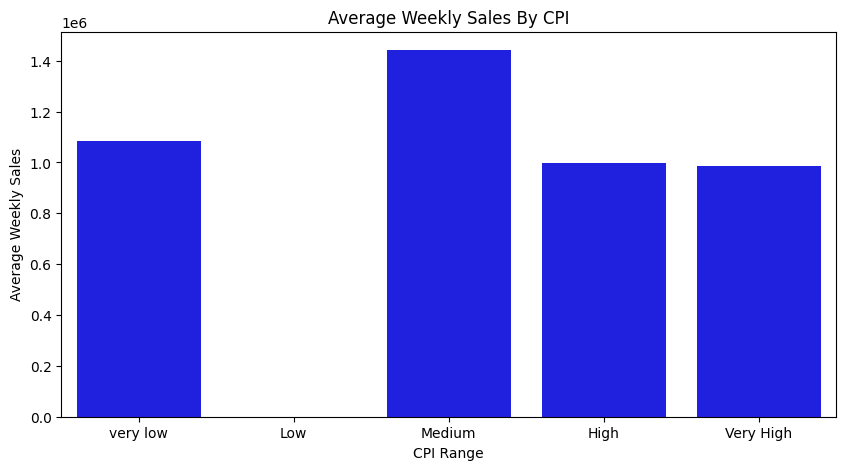

In [30]:
plt.figure(figsize=(10,5))
sns.barplot(data=cpi_sales,x='CPI_Level',y='Weekly_Sales', color='blue')
plt.title('Average Weekly Sales By CPI')
plt.xlabel('CPI Range')
plt.ylabel('Average Weekly Sales')
plt.grid=True
plt.show()

**5. Top performing stores according to the historical data.**

In [31]:
df.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment', 'Month', 'year', 'CPI_Level'],
      dtype='object')

In [32]:
top_performing_stores = df.groupby('Store')['Weekly_Sales'].sum().sort_values(ascending=False).reset_index()
top_performing_stores.head(10)

Store  Weekly_Sales
0     20  3.013978e+08
1      4  2.995440e+08
2     14  2.889999e+08
3     13  2.865177e+08
4      2  2.753824e+08
5     10  2.716177e+08
6     27  2.538559e+08
7      6  2.237561e+08
8      1  2.224028e+08
9     39  2.074455e+08

/tmp/ipython-input-33-2142276877.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Store',y='Weekly_Sales',data=top_performing_stores.head(10),palette='Blues')


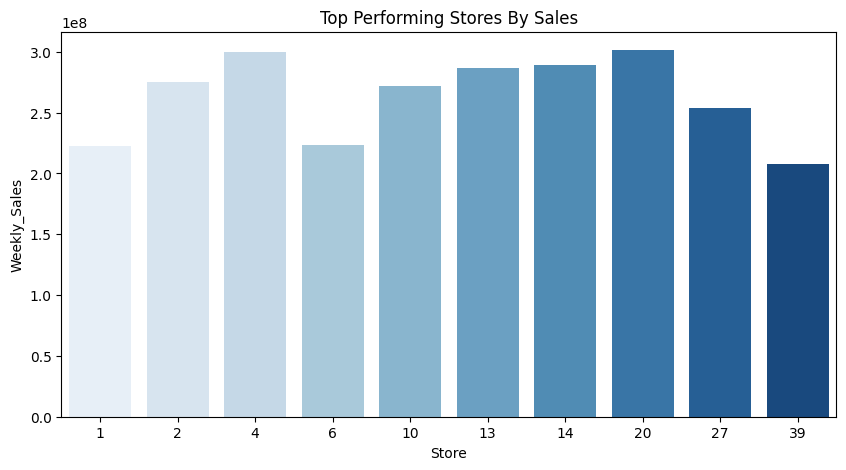

In [33]:
plt.figure(figsize=(10,5))
sns.barplot(x='Store',y='Weekly_Sales',data=top_performing_stores.head(10),palette='Blues')
plt.title('Top Performing Stores By Sales')
plt.xlabel('Store')
plt.ylabel('Weekly_Sales')
plt.show()

**These stores show consistently high average weekly sales, indicating strong revenue performance over time.**

.

**6.The worst performing store, and how significant is the difference between the
 highest and lowest performing stores**

In [34]:
df.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment', 'Month', 'year', 'CPI_Level'],
      dtype='object')

In [35]:
store_avg_sales = df.groupby('Store')['Weekly_Sales'].mean().sort_values(ascending=False).reset_index()
store_avg_sales

Store  Weekly_Sales
0      20  2.107677e+06
1       4  2.094713e+06
2      14  2.020978e+06
3      13  2.003620e+06
4       2  1.925751e+06
5      10  1.899425e+06
6      27  1.775216e+06
7       6  1.564728e+06
8       1  1.555264e+06
9      39  1.450668e+06
10     19  1.444999e+06
11     31  1.395901e+06
12     23  1.389864e+06
13     24  1.356755e+06
14     11  1.356383e+06
15     28  1.323522e+06
16     41  1.268125e+06
17     32  1.166568e+06
18     18  1.084718e+06
19     22  1.028501e+06
20     12  1.009002e+06
21     26  1.002912e+06
22     34  9.667816e+05
23     40  9.641280e+05
24     35  9.197250e+05
25      8  9.087495e+05
26     17  8.935814e+05
27     45  7.859814e+05
28     21  7.560691e+05
29     25  7.067215e+05
30     43  6.333247e+05
31     15  6.233125e+05
32      7  5.706173e+05
33     42  5.564039e+05
34      9  5.439806e+05
35     29  5.394514e+05
36     16  5.192477e+05
37     37  5.189003e+05
38     30  4.385796e+05
39      3  4.027044e+05
40     38  3.857317e+05
41     36  3.735120e+05
42      5  3.180118e+05
43     44  3.027489e+05
44     33  2.598617e+05

In [36]:
top_store = store_avg_sales.iloc[0]
bottom_store = store_avg_sales.iloc[-1]

In [37]:
bottom_store
top_store

Store           2.000000e+01
Weekly_Sales    2.107677e+06
Name: 0, dtype: float64

In [38]:
print("🏆 Highest Performing Store:")
print(top_store)

🏆 Highest Performing Store:
Store           2.000000e+01
Weekly_Sales    2.107677e+06
Name: 0, dtype: float64


In [39]:
print("🏆 Lowest Performing Store:")
print(bottom_store)


🏆 Lowest Performing Store:
Store               33.000000
Weekly_Sales    259861.692028
Name: 44, dtype: float64


In [40]:
sales_diff = top_store['Weekly_Sales'] - bottom_store['Weekly_Sales']
sales_diff

np.float64(1847815.1783216782)

In [41]:
percentage_diff = (sales_diff/top_store['Weekly_Sales'])*100
percentage_diff

np.float64(87.67070533042084)

In [42]:
sns.color_palette()

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

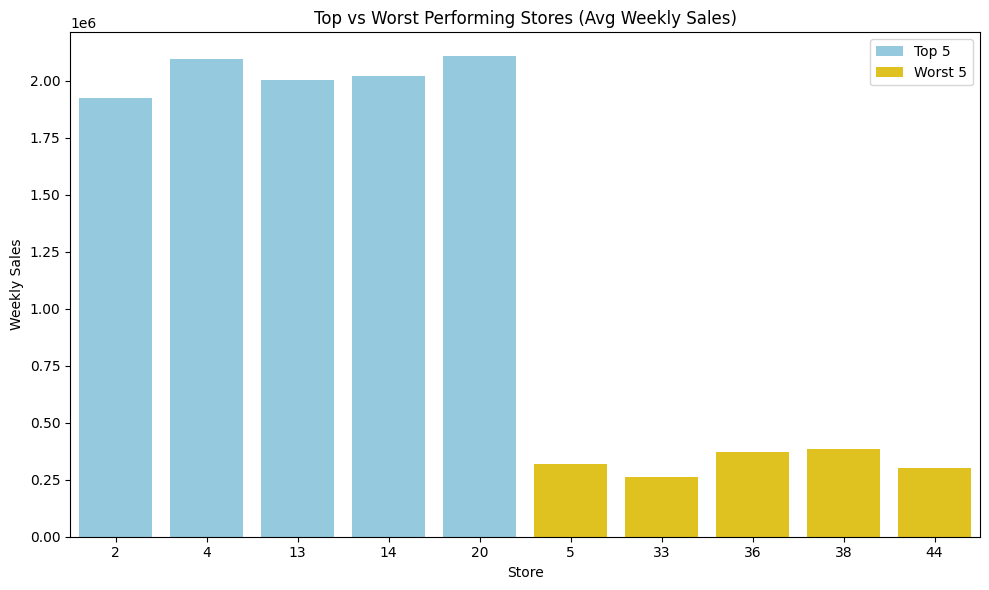

In [43]:
plt.figure(figsize=(10,6))
sns.barplot(data=store_avg_sales.head(5),x='Store',y='Weekly_Sales',color='skyblue', label='Top 5')
sns.barplot(data=store_avg_sales.tail(5),x='Store',y='Weekly_Sales',color='gold', label = 'Worst 5')
plt.title('Top vs Worst Performing Stores (Avg Weekly Sales)')
plt.xlabel('Store')
plt.ylabel('Weekly Sales')
plt.legend()
plt.tight_layout()
plt.show()

**The worst performing store is Store 33 with an average weekly sale of 259861, while the top store is Store 20 with $2.107677.**

.

**Use predictive modeling techniques to forecast the sales for each store for the next 12 weeks**

In [44]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df = df.sort_values(by=['Store','Date'])

In [45]:
df.head(5)

Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1 2010-02-05    1643690.90             0        42.31       2.572   
1      1 2010-02-12    1641957.44             1        38.51       2.548   
2      1 2010-02-19    1611968.17             0        39.93       2.514   
3      1 2010-02-26    1409727.59             0        46.63       2.561   
4      1 2010-03-05    1554806.68             0        46.50       2.625   

          CPI  Unemployment  Month  year  CPI_Level  
0  211.096358         8.106      2  2010  Very High  
1  211.242170         8.106      2  2010  Very High  
2  211.289143         8.106      2  2010  Very High  
3  211.319643         8.106      2  2010  Very High  
4  211.350143         8.106      3  2010  Very High

In [46]:
store_1 = df[df['Store']==1][['Date','Weekly_Sales']].copy()
store_1

Date  Weekly_Sales
0   2010-02-05    1643690.90
1   2010-02-12    1641957.44
2   2010-02-19    1611968.17
3   2010-02-26    1409727.59
4   2010-03-05    1554806.68
..         ...           ...
138 2012-09-28    1437059.26
139 2012-10-05    1670785.97
140 2012-10-12    1573072.81
141 2012-10-19    1508068.77
142 2012-10-26    1493659.74

[143 rows x 2 columns]

In [47]:
store_1['Week_Num'] = range(1, len(store_1)+1)
store_1

Date  Weekly_Sales  Week_Num
0   2010-02-05    1643690.90         1
1   2010-02-12    1641957.44         2
2   2010-02-19    1611968.17         3
3   2010-02-26    1409727.59         4
4   2010-03-05    1554806.68         5
..         ...           ...       ...
138 2012-09-28    1437059.26       139
139 2012-10-05    1670785.97       140
140 2012-10-12    1573072.81       141
141 2012-10-19    1508068.77       142
142 2012-10-26    1493659.74       143

[143 rows x 3 columns]

In [48]:
from sklearn.linear_model import LinearRegression as lr
x= store_1[['Week_Num']]
y= store_1['Weekly_Sales']
model = lr()
model.fit(x,y)

LinearRegression()

In [49]:
future_weeks = pd.DataFrame({'Week_Num': range(x['Week_Num'].max()+1, x['Week_Num'].max()+13)})
future_weeks

Week_Num
0        144
1        145
2        146
3        147
4        148
5        149
6        150
7        151
8        152
9        153
10       154
11       155

In [50]:
future_sales = model.predict(future_weeks)

In [51]:
future_weeks['predicted_weekly_sales'] = future_sales

In [52]:
future_weeks

Week_Num  predicted_weekly_sales
0        144            1.613428e+06
1        145            1.614236e+06
2        146            1.615044e+06
3        147            1.615852e+06
4        148            1.616659e+06
5        149            1.617467e+06
6        150            1.618275e+06
7        151            1.619083e+06
8        152            1.619891e+06
9        153            1.620698e+06
10       154            1.621506e+06
11       155            1.622314e+06

In [53]:
future_weeks['Date'] = pd.date_range(start=store_1['Date'].iloc[-1] + pd.Timedelta(weeks=1), periods = 12, freq = 'W')
future_weeks

Week_Num  predicted_weekly_sales       Date
0        144            1.613428e+06 2012-11-04
1        145            1.614236e+06 2012-11-11
2        146            1.615044e+06 2012-11-18
3        147            1.615852e+06 2012-11-25
4        148            1.616659e+06 2012-12-02
5        149            1.617467e+06 2012-12-09
6        150            1.618275e+06 2012-12-16
7        151            1.619083e+06 2012-12-23
8        152            1.619891e+06 2012-12-30
9        153            1.620698e+06 2013-01-06
10       154            1.621506e+06 2013-01-13
11       155            1.622314e+06 2013-01-20

In [54]:
future_weeks.columns

Index(['Week_Num', 'predicted_weekly_sales', 'Date'], dtype='object')

In [57]:
import importlib
import matplotlib.pyplot as plt
importlib.reload(plt)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

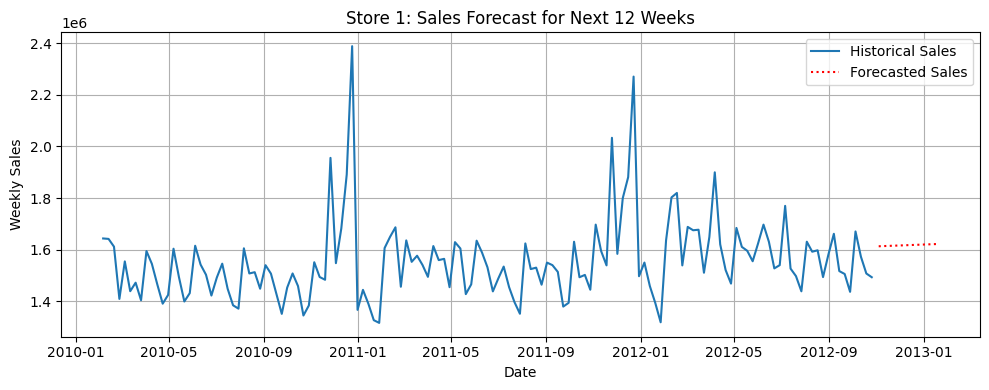

In [60]:
plt.figure(figsize=(10,4))
plt.plot(store_1['Date'], store_1['Weekly_Sales'], label='Historical Sales')
plt.plot(future_weeks['Date'], future_weeks['predicted_weekly_sales'], label='Forecasted Sales', color='red', linestyle='dotted')
plt.title('Store 1: Sales Forecast for Next 12 Weeks')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [61]:
all_forecasts = []

for store_id in df['Store'].unique():
    store_df = df[df['Store'] == store_id][['Date', 'Weekly_Sales']].copy()
    store_df = store_df.groupby('Date').sum().reset_index()
    store_df = store_df.sort_values('Date')
    store_df['Week_Num'] = range(1, len(store_df)+1)

    # Train model
    X = store_df[['Week_Num']]
    y = store_df['Weekly_Sales']
    model = lr()
    model.fit(X, y)

    # Predict next 12 weeks
    future_weeks = pd.DataFrame({'Week_Num': range(len(store_df)+1, len(store_df)+13)})
    future_sales = model.predict(future_weeks)
    future_dates = pd.date_range(start=store_df['Date'].iloc[-1] + pd.Timedelta(weeks=1), periods=12, freq='W')

    store_forecast = pd.DataFrame({
        'Store': store_id,
        'Date': future_dates,
        'predicted_weekly_sales': future_sales
    })

    all_forecasts.append(store_forecast)

# Combine all
final_forecast_df = pd.concat(all_forecasts)


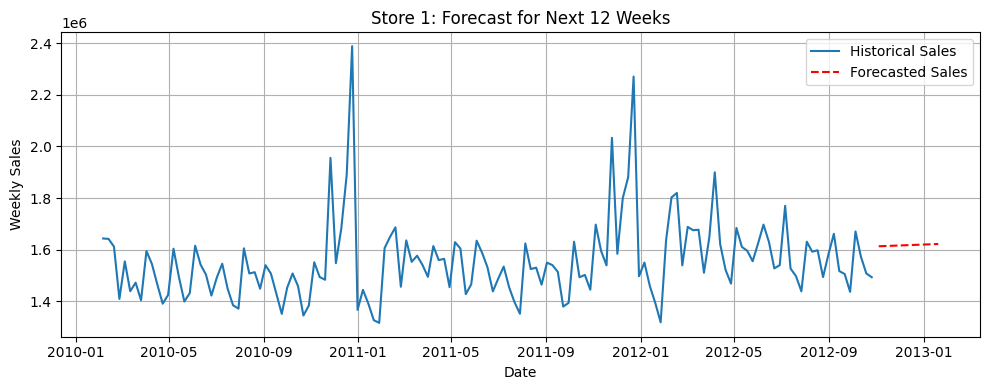

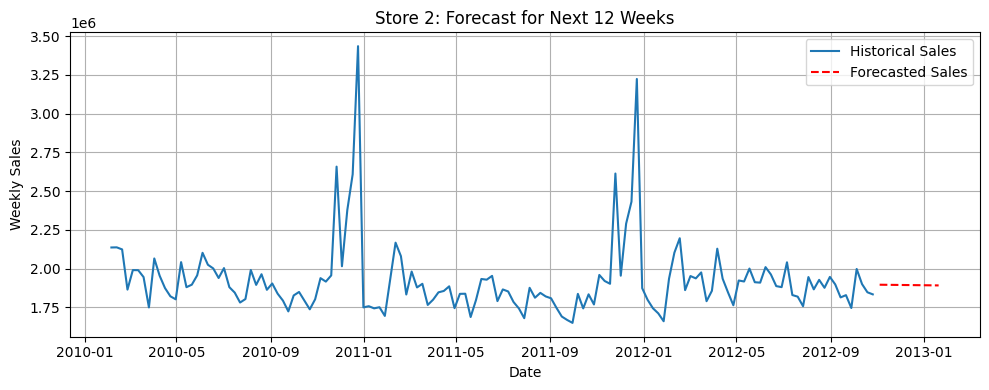

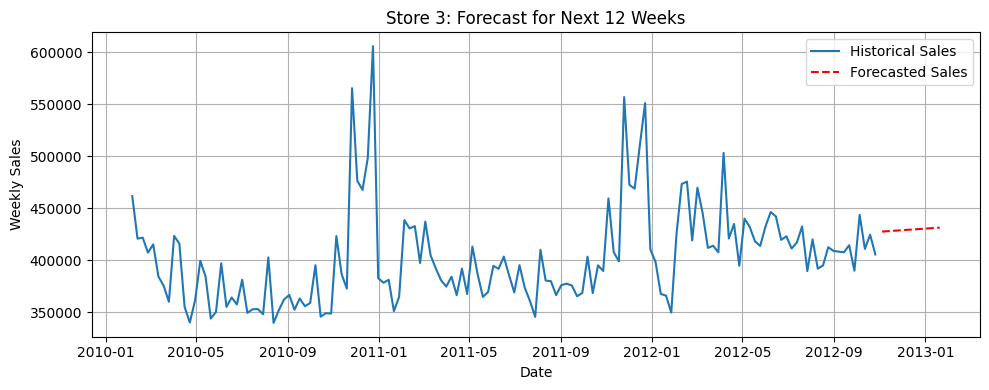

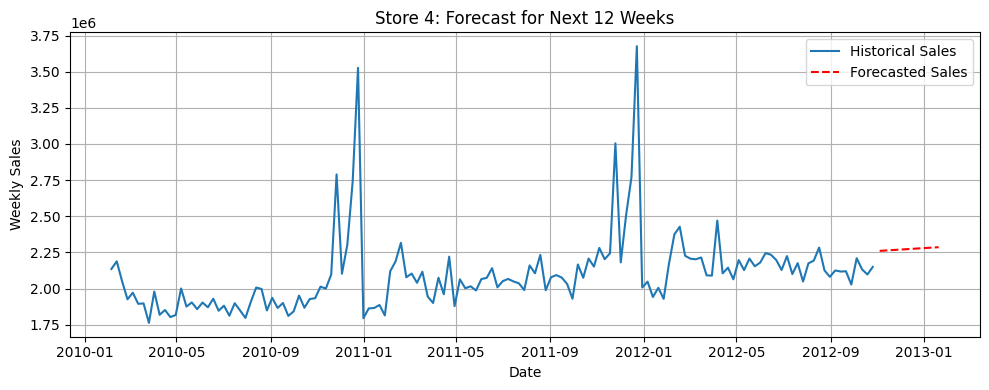

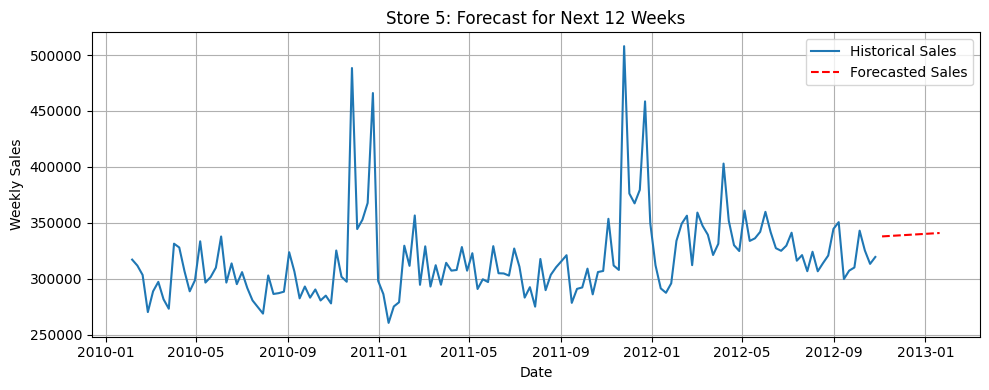

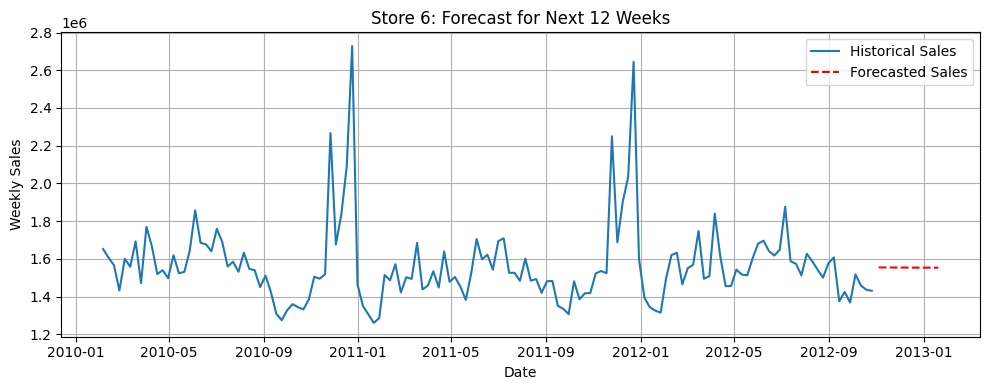

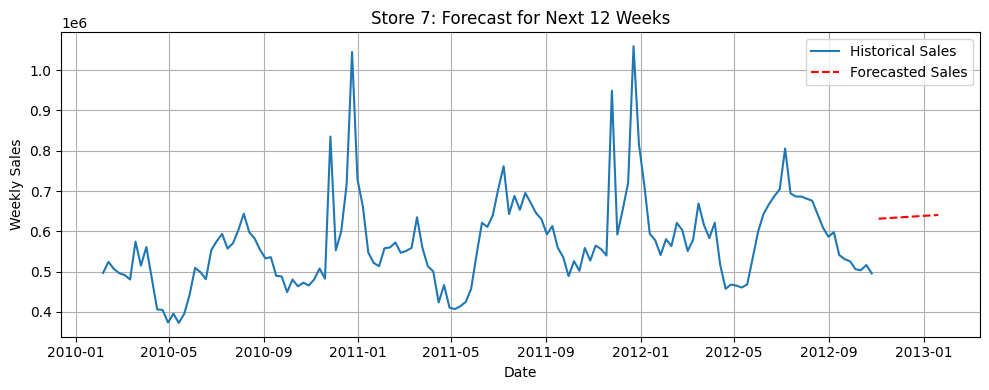

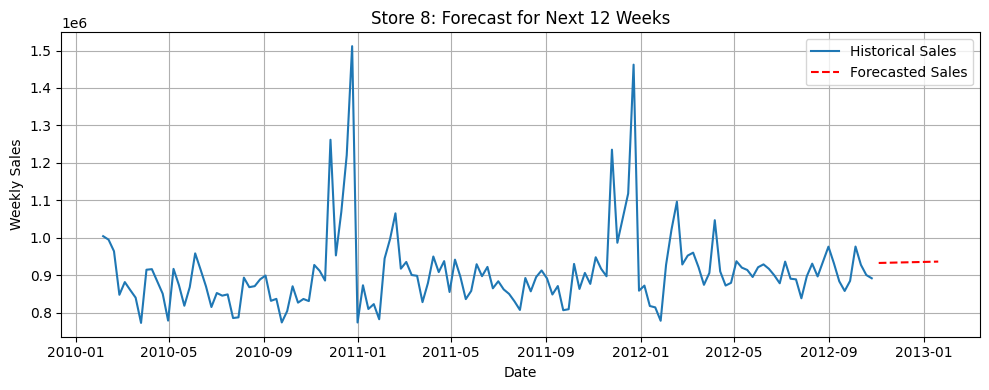

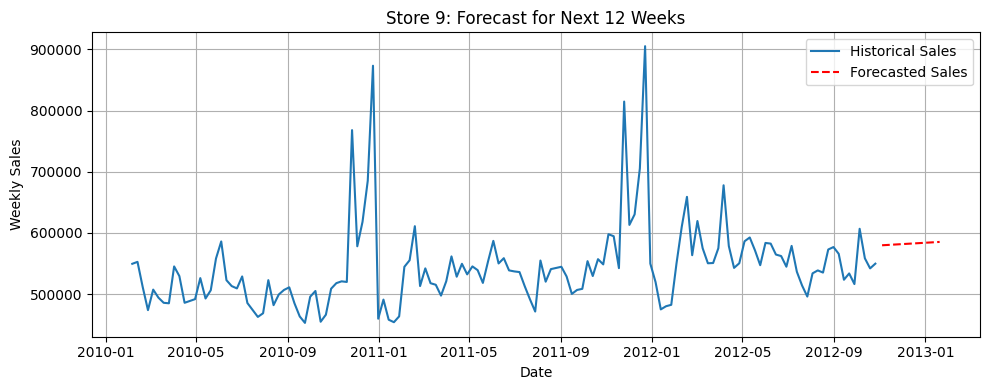

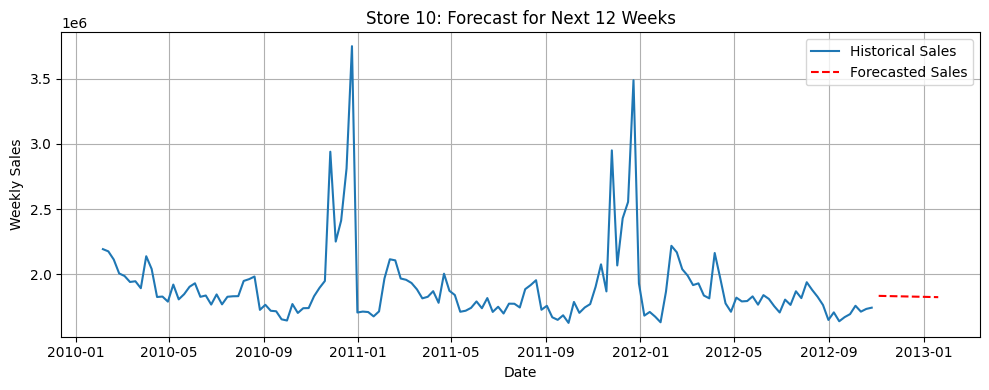

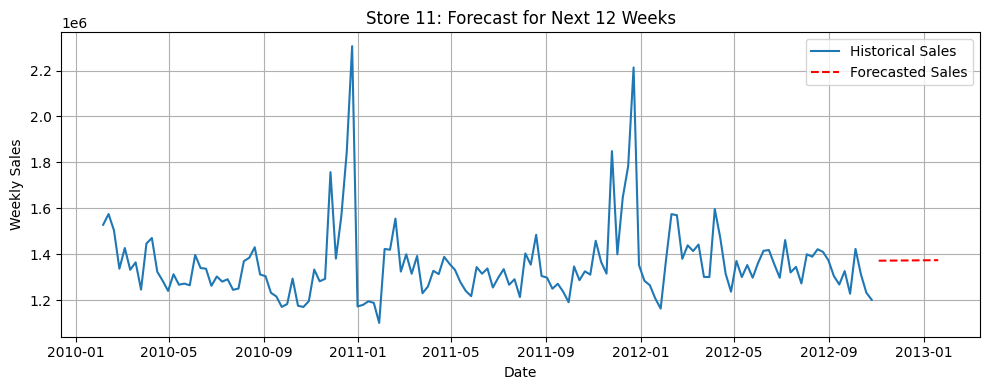

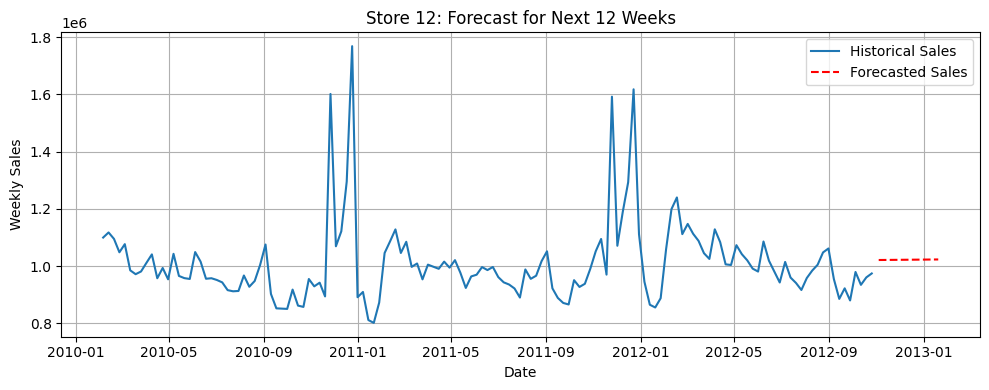

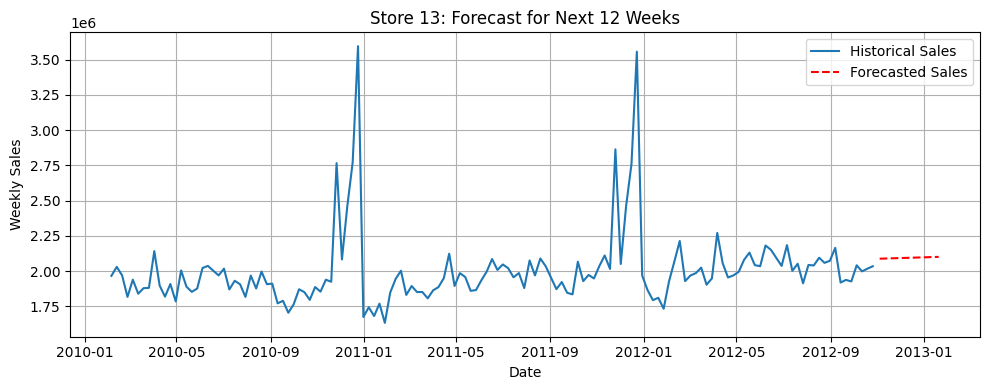

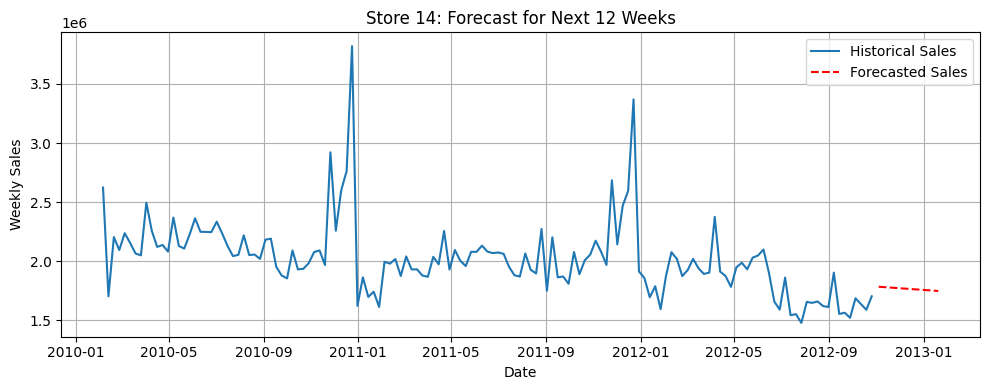

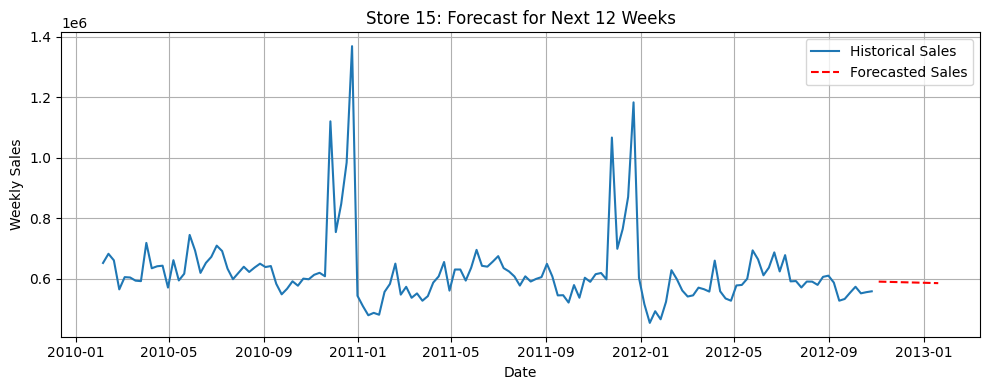

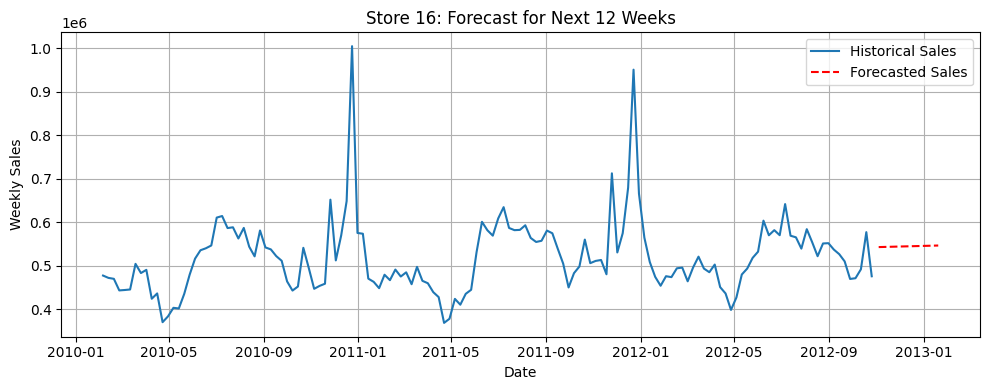

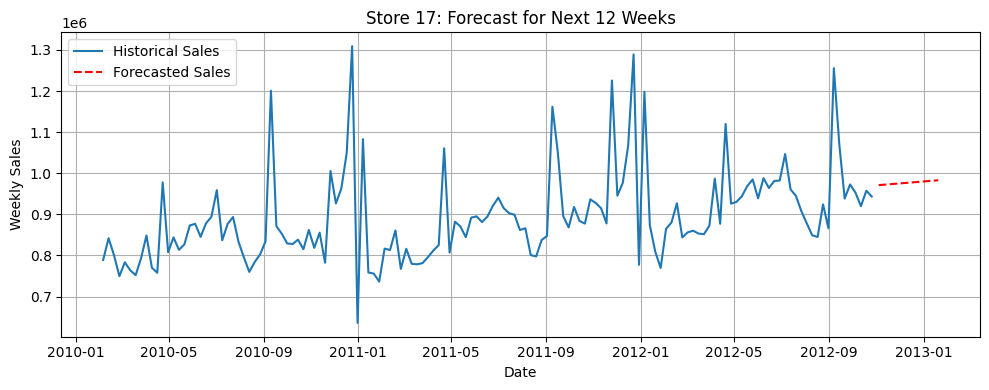

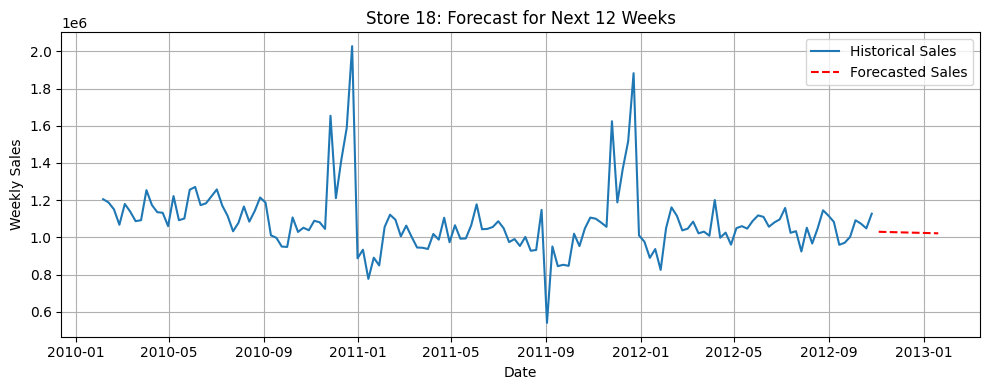

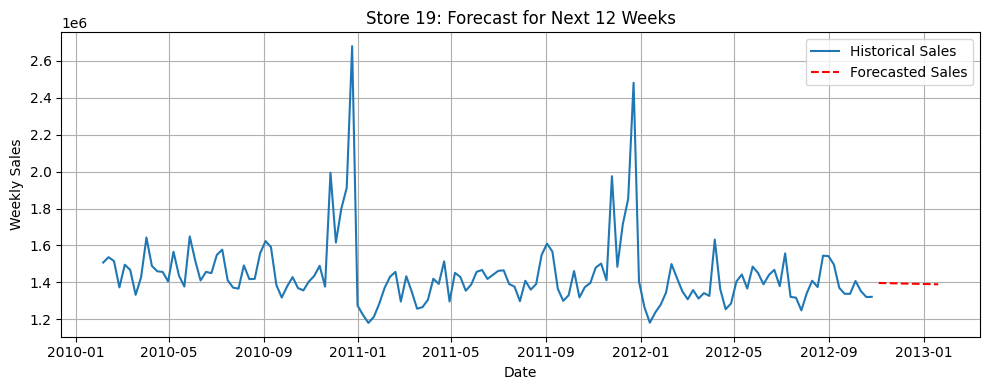

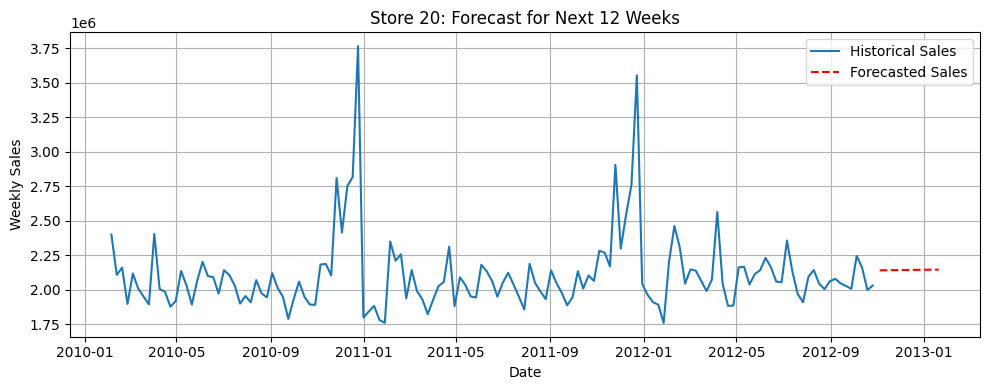

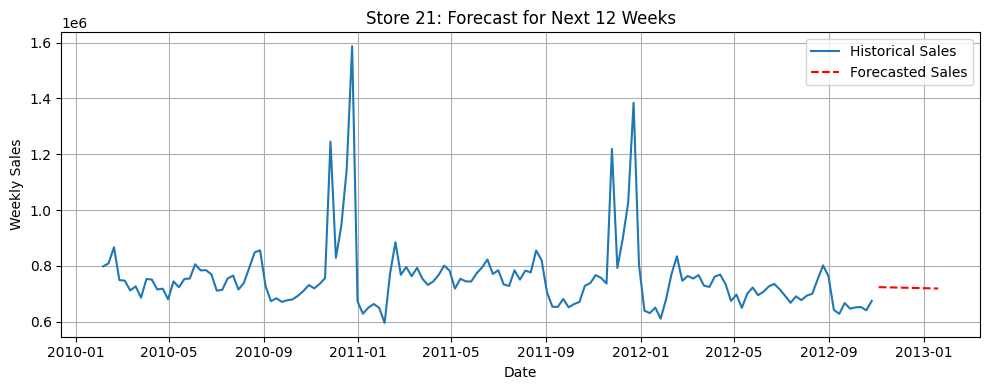

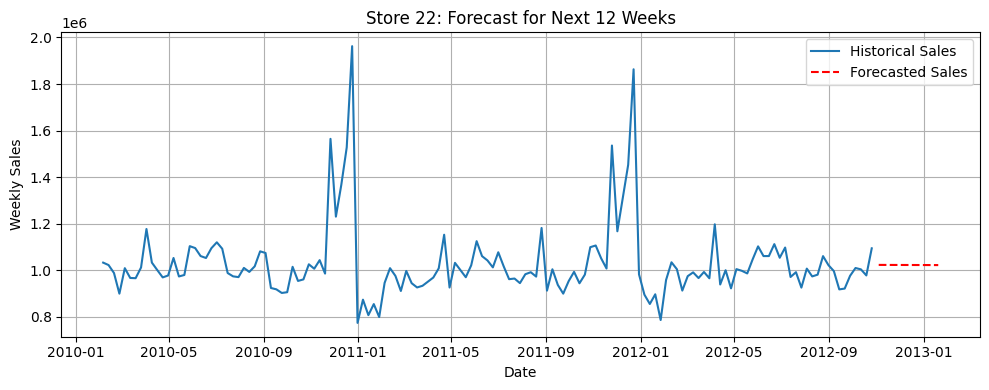

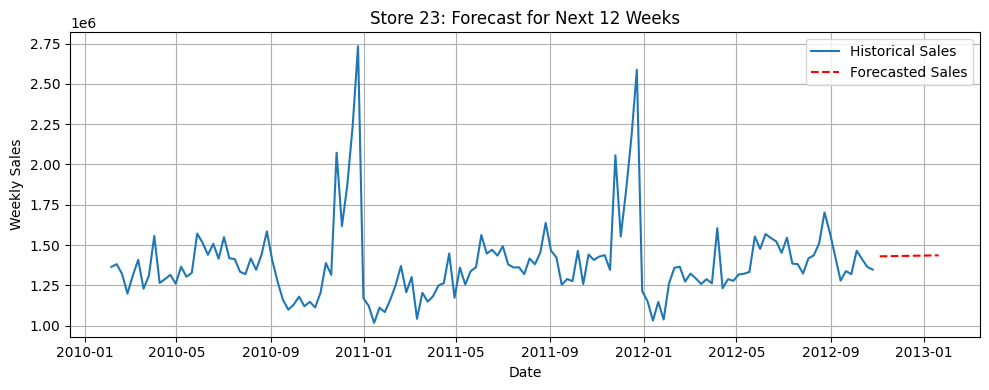

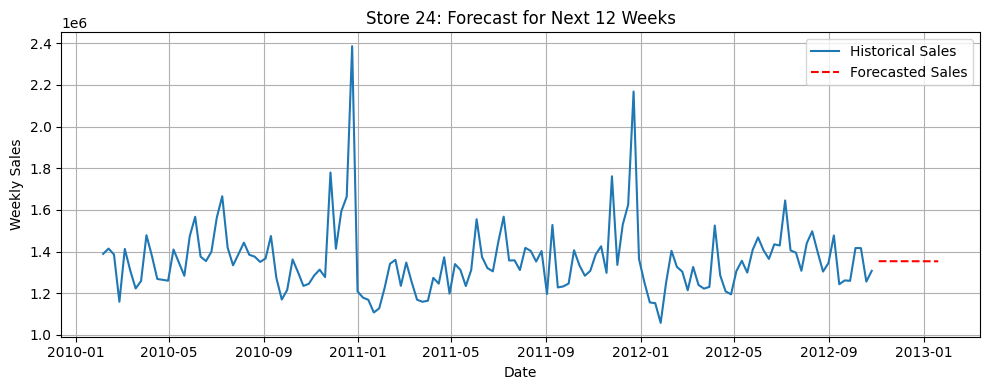

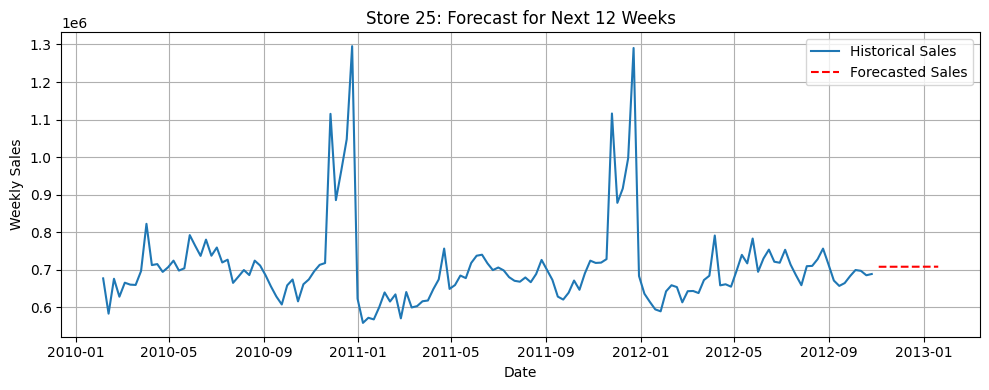

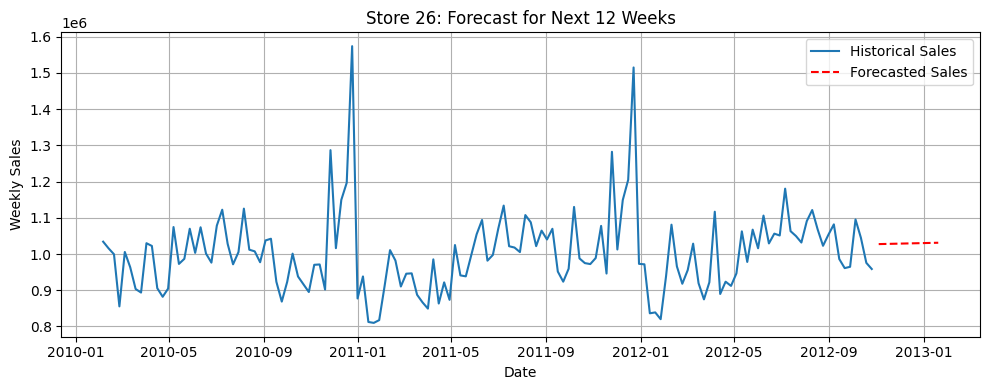

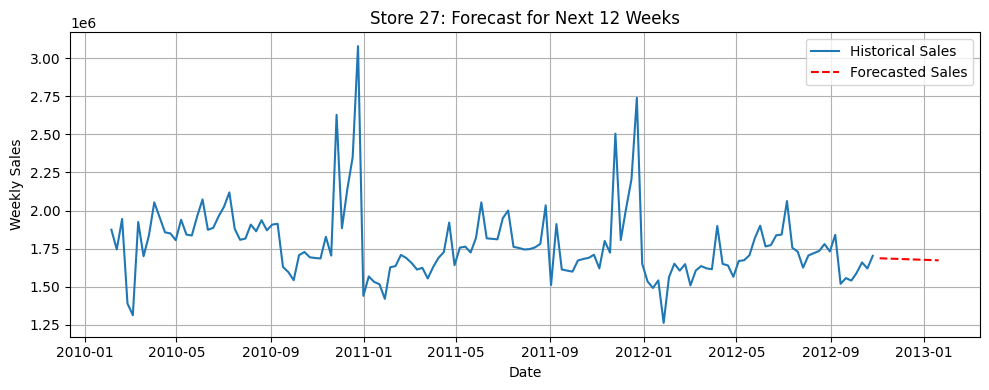

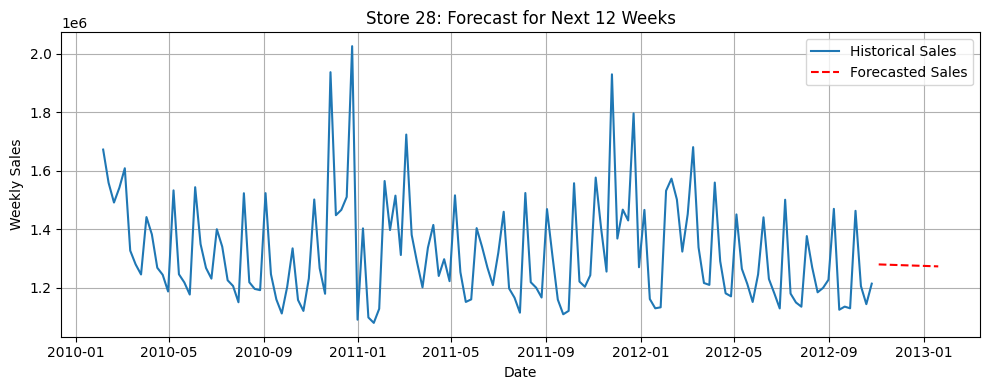

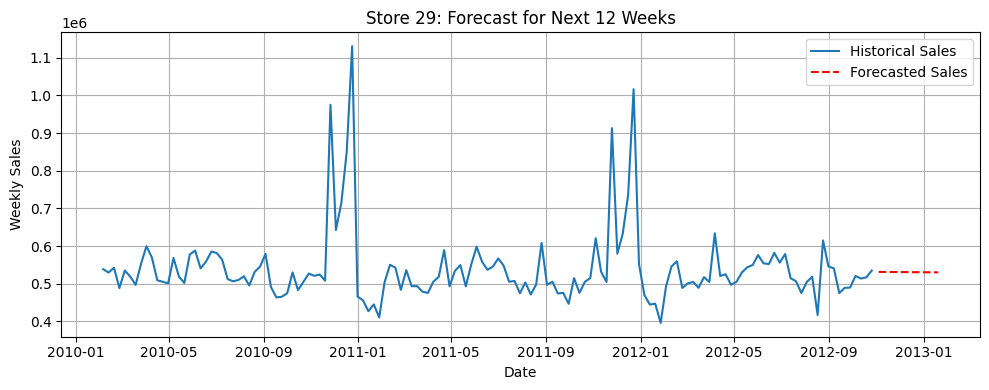

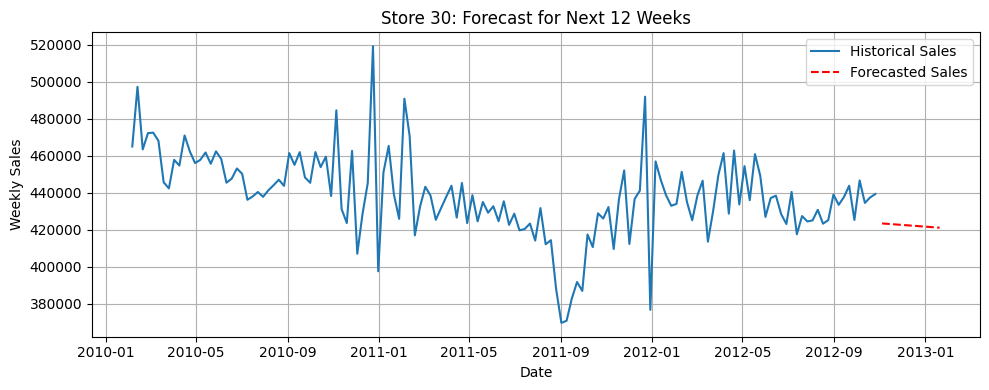

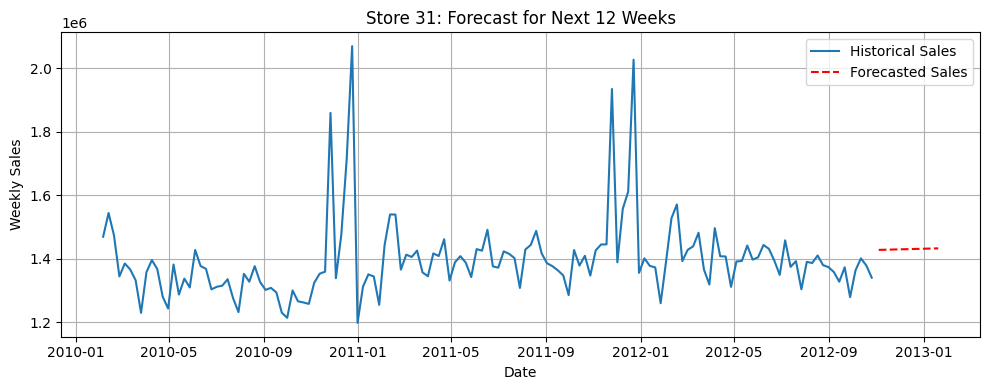

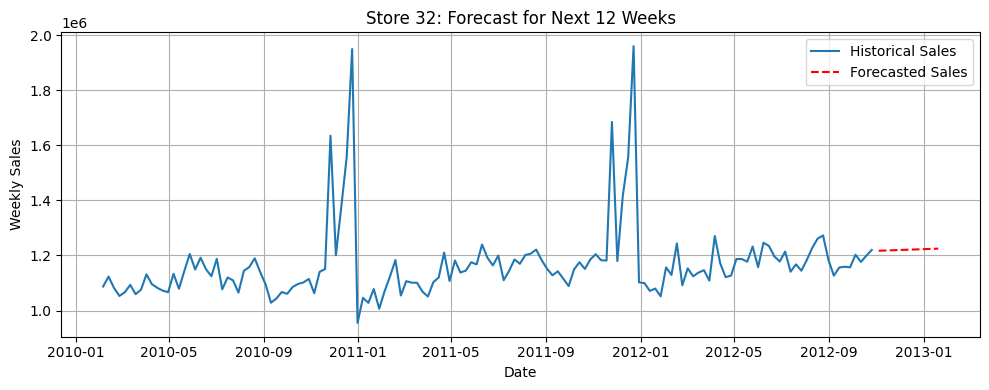

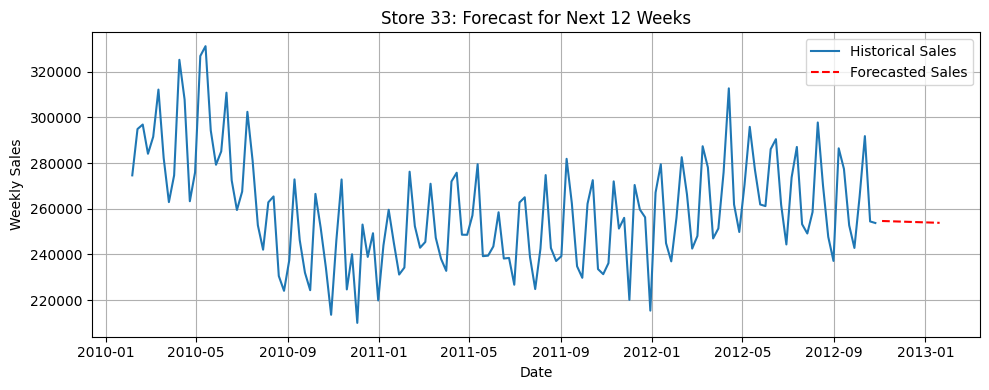

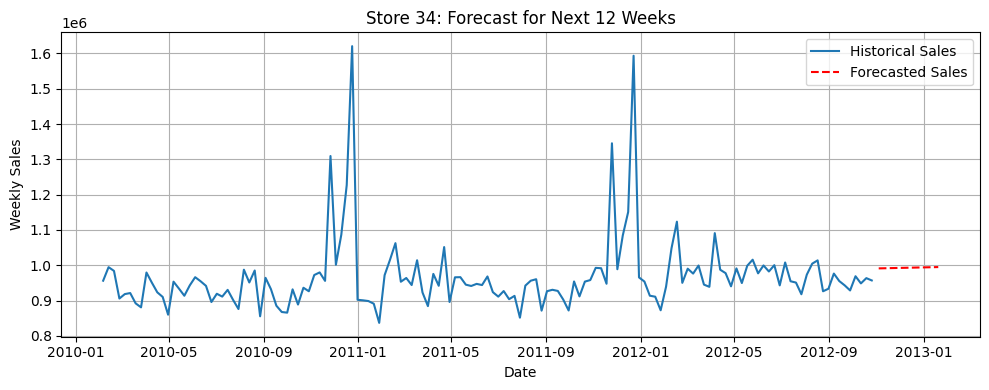

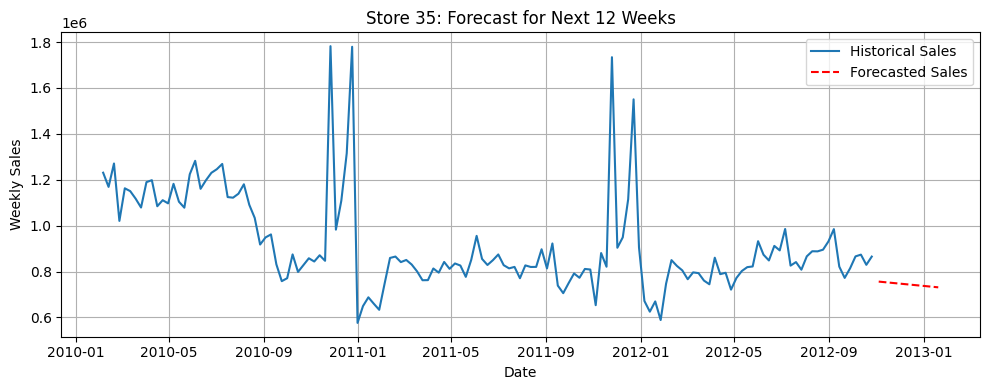

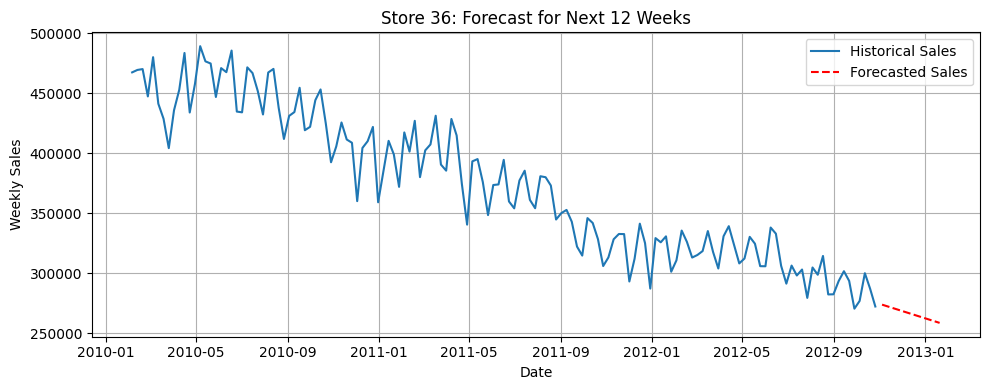

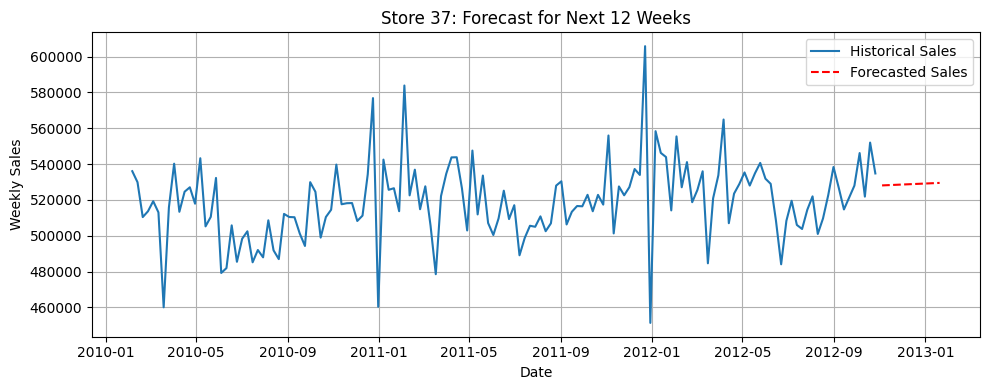

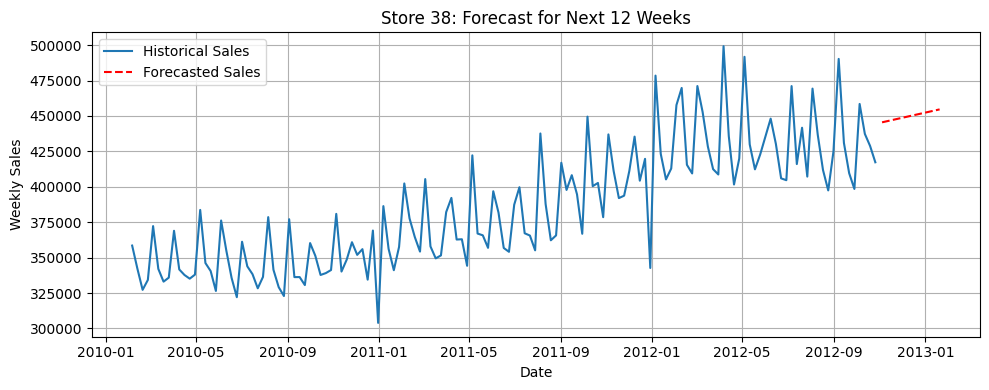

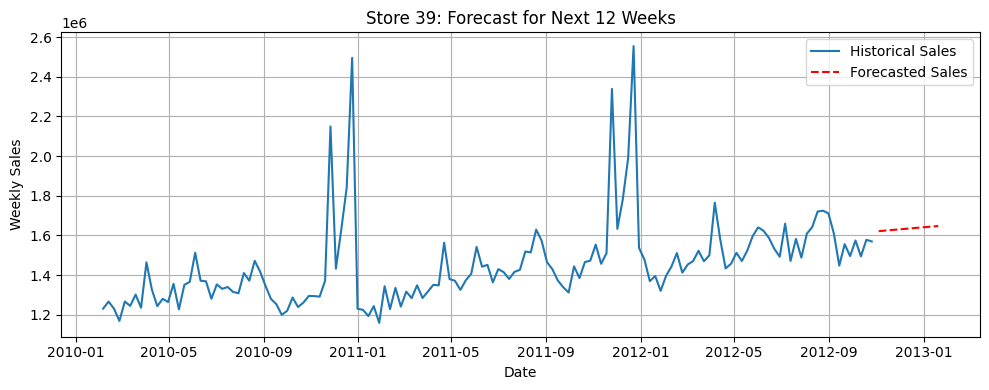

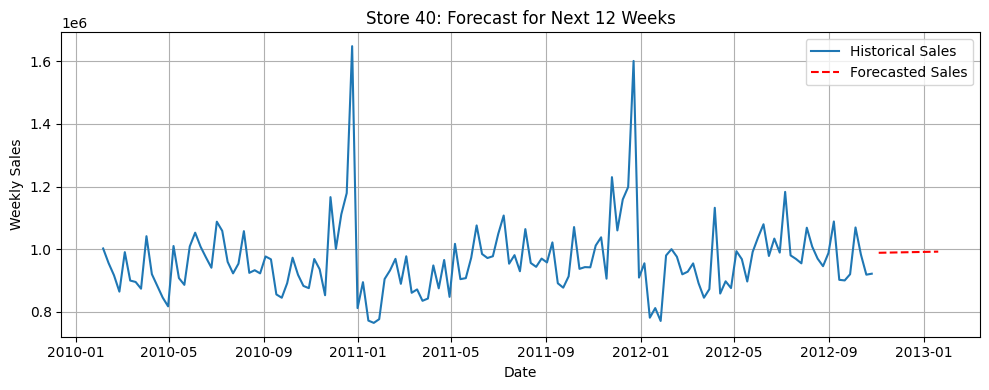

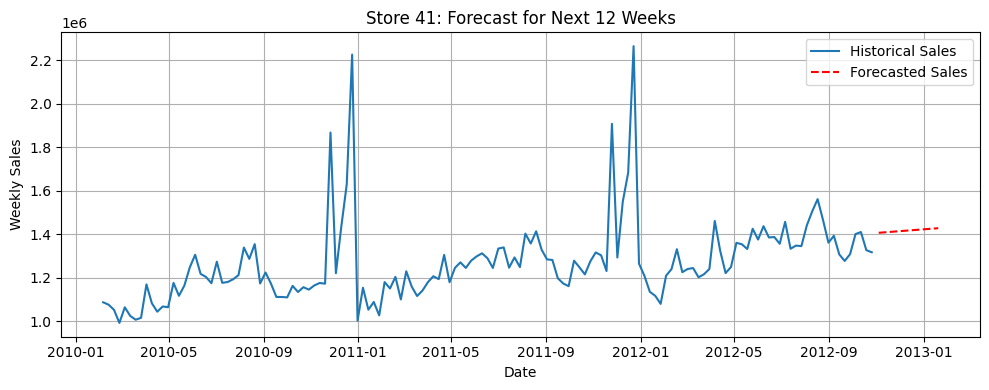

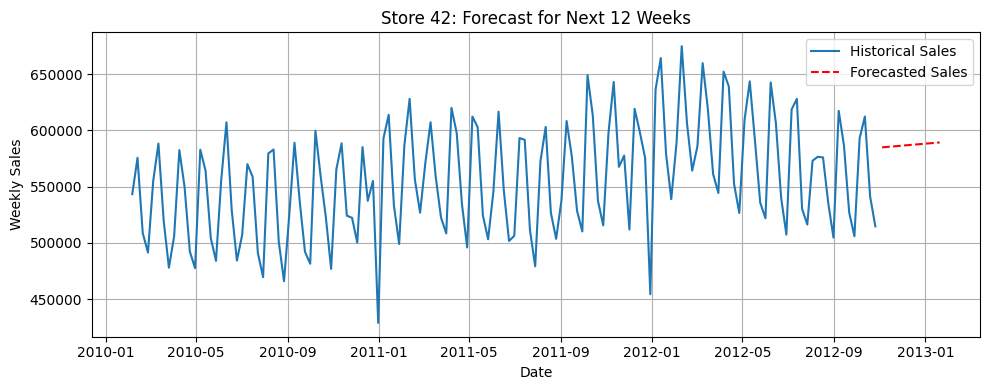

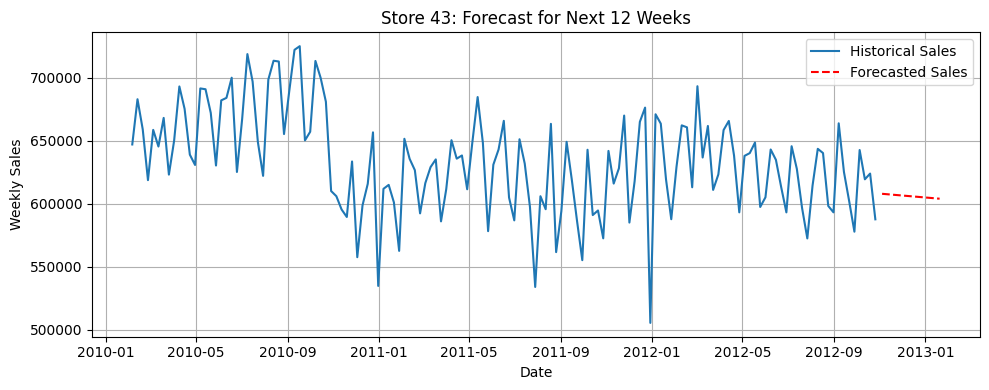

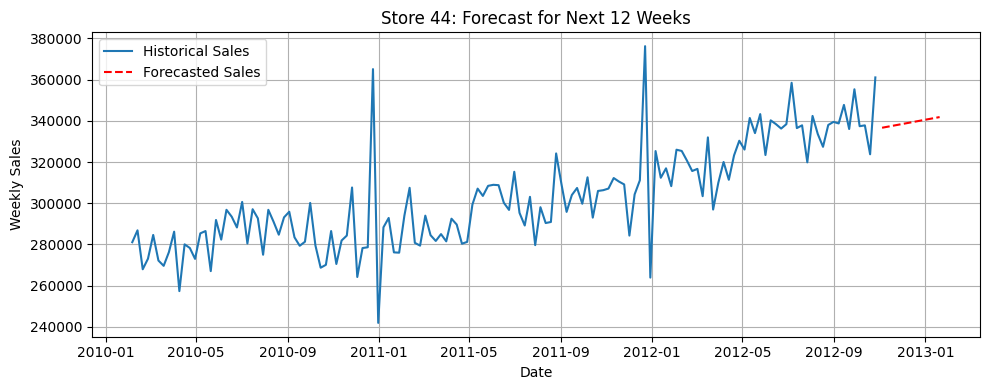

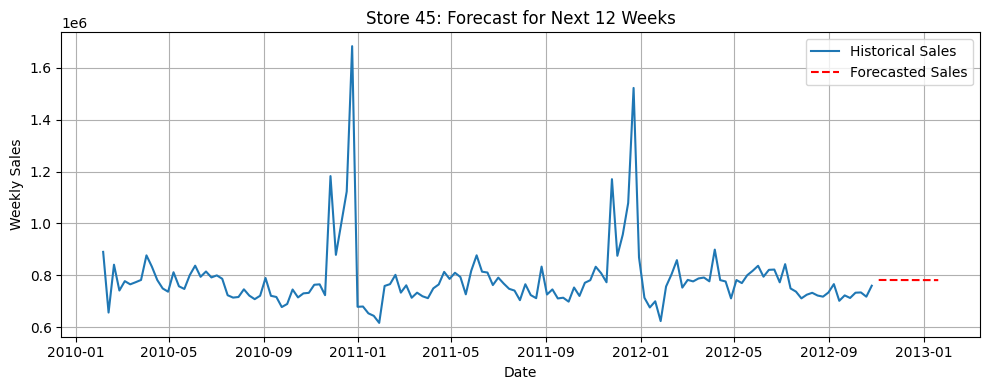

In [62]:
# Converting Date and sorting
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df = df.sort_values(by=['Store', 'Date'])

# Loop over each store
store_ids = df['Store'].unique()

for store_id in store_ids:
    store_data = df[df['Store'] == store_id][['Date', 'Weekly_Sales']].copy()
    store_data = store_data.groupby('Date').sum().reset_index()
    store_data['Week_Num'] = range(1, len(store_data)+1)

    # Prepare features and target
    X = store_data[['Week_Num']]
    y = store_data['Weekly_Sales']

    model = LinearRegression()
    model.fit(X, y)

    # Predict next 12 weeks
    future_weeks = pd.DataFrame({'Week_Num': range(X['Week_Num'].max()+1, X['Week_Num'].max()+13)})
    future_sales = model.predict(future_weeks)
    future_dates = pd.date_range(start=store_data['Date'].max() + pd.Timedelta(weeks=1), periods=12, freq='W')

    forecast_df = pd.DataFrame({
        'Date': future_dates,
        'Predicted_Weekly_Sales': future_sales
    })

    # Plot historical + forecast
    plt.figure(figsize=(10, 4))
    plt.plot(store_data['Date'], store_data['Weekly_Sales'], label='Historical Sales')
    plt.plot(forecast_df['Date'], forecast_df['Predicted_Weekly_Sales'],
             label='Forecasted Sales', color='red', linestyle='--')
    plt.title(f'Store {store_id}: Forecast for Next 12 Weeks')
    plt.xlabel('Date')
    plt.ylabel('Weekly Sales')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
